# Covid19 Fälle
Plot der Covid19 Fälle in den letzten 30 Tagen mit Aufschlüsselung nach Landkreisen

In [1]:
import pandas as pd
import sqlalchemy as db
# Import Database and select necessary data
engine = db.create_engine('sqlite:///data.db')
conn = engine.connect()


Datenausgabe aus der Datenbank

In [2]:
# Read Cov19 cases seperated by Landkreis, Refdatum, Geschlecht
cov = pd.read_sql_query(
    "SELECT IdLandkreis, sum(AnzahlFall) as Fälle, SUM(AnzahlGenesen) as Genesen, SUM(AnzahlTodesfall) as Todesfall FROM covid c WHERE Refdatum < CURRENT_DATE GROUP BY IdLandkreis;", conn)
# Print result
cov

,IdLandkreis,Fälle,Genesen,Todesfall
0,1001,5314,4309,48
1,1002,14275,11079,131
2,1003,13530,10397,119
3,1004,4496,3842,31
4,1051,6108,4332,63
...,...,...,...,...
406,16073,16857,15759,447
407,16074,12143,10634,186
408,16075,14532,13286,277
409,16076,16257,13800,294


Plot

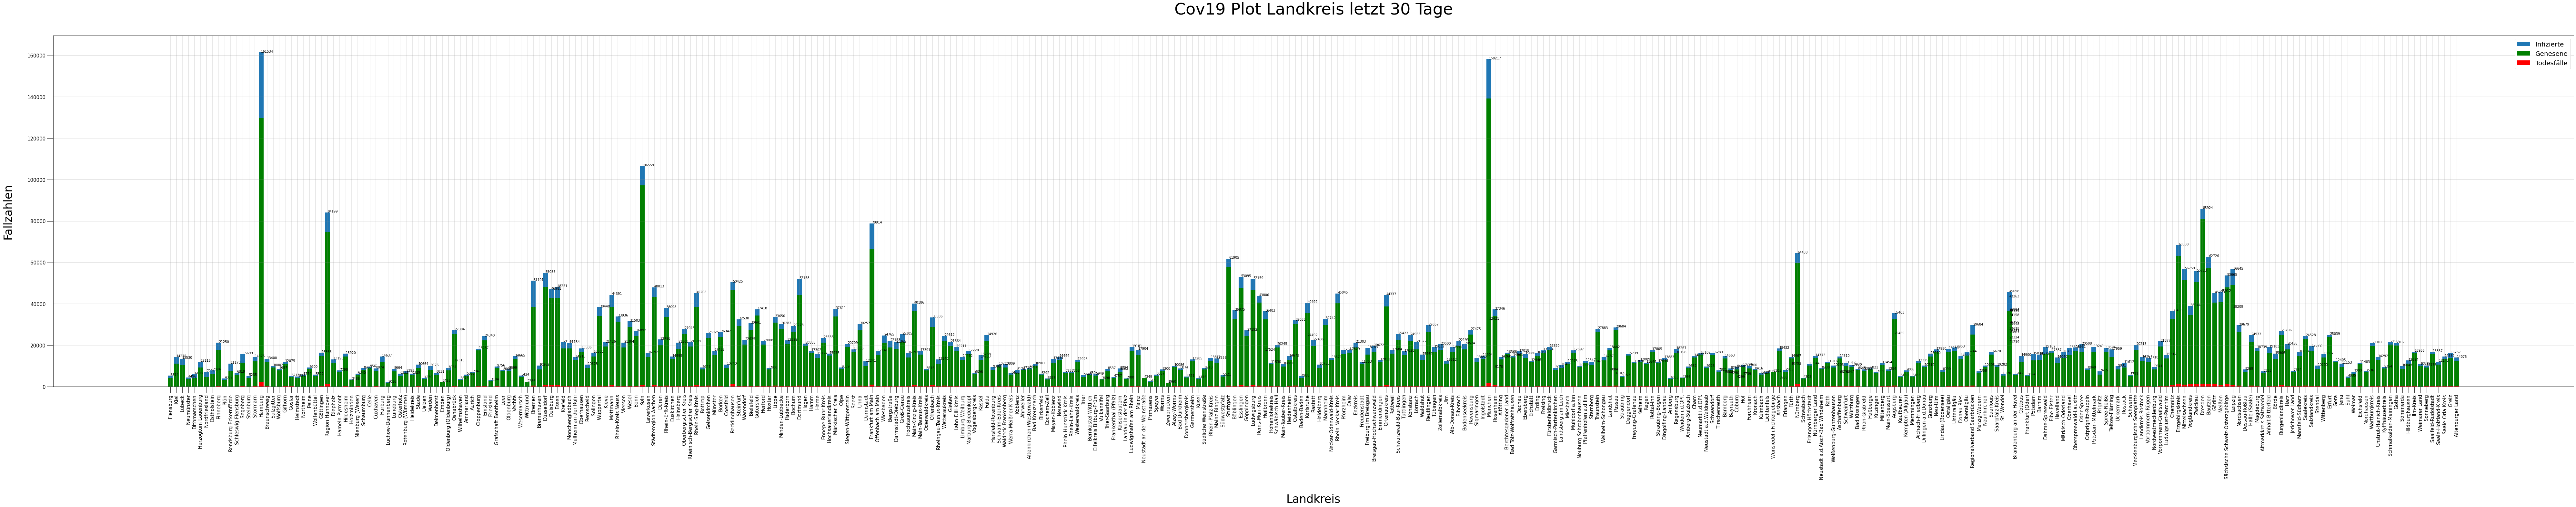

In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kreisid import kreisid

re=cov['Genesen']
de=cov['Todesfall']
co=cov['Fälle']
x=list()

for kreis in cov['IdLandkreis']:
    x.append(kreisid(str(kreis)))

plt.figure(figsize=(140,20))
ax=plt.axes()
  
#ax.set_facecolor('black')
ax.grid(linewidth=0.4, color='#8f8f8f')
  
  
plt.xticks(rotation='vertical',
           size='15')#ticks of X
  
plt.yticks(size='15',color='black')
  
  
ax.set_xlabel('\nLandkreis',size=35, color='black')
ax.set_ylabel('Fallzahlen\n',size=35, color='black')

plt.tick_params(size=20,color='black')
  
  
ax.set_title('Cov19 Plot Landkreis letzt 30 Tage\n',
             size=50,color='black')
  
plt.bar(x,co,label='re')
plt.bar(x,re,label='re',color='green')
plt.bar(x,de,label='re',color='red')
  
for i,j in zip(x,co):
    ax.annotate(str(int(j)),
                xy=(i,j+3),
                color='black',
                size=10)
  
plt.legend(['Infizierte','Genesene','Todesfälle'],
           fontsize=20)

## ICU Plot

In [4]:
# Read Cov19 cases seperated by Landkreis, Refdatum, Geschlecht
betten = pd.read_sql_query(
    "SELECT * FROM fallzahlen f GROUP BY datum, bundesland;", conn)
# Print result
betten

,id,datum,bundesland,gemeindeschluessel,anzahl_standorte,anzahl_meldebereiche,faelle_covid_aktuell,faelle_covid_aktuell_invasiv_beatmet,betten_frei,betten_belegt,betten_belegt_nur_erwachsen,betten_frei_nur_erwachsen
0,1,2020-04-24,1,1001,2,2,1,1,40,38,38,40
1,16,2020-04-24,2,2000,24,27,74,62,338,549,532,319
2,17,2020-04-24,3,3101,5,5,6,6,50,91,91,50
3,62,2020-04-24,4,4011,9,10,8,7,77,119,113,69
4,64,2020-04-24,5,5111,11,12,26,21,81,222,222,81
...,...,...,...,...,...,...,...,...,...,...,...,...
10075,249231,2022-01-13,12,12051,3,4,9,4,21,50,45,10
10076,249249,2022-01-13,13,13003,2,4,17,17,24,92,79,13
10077,249257,2022-01-13,14,14511,3,7,27,18,30,154,141,17
10078,249270,2022-01-13,15,15001,1,3,8,5,12,28,25,3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


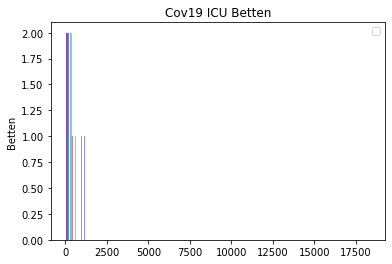

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plot = betten.drop(['anzahl_standorte', 'anzahl_meldebereiche', 'bundesland'], axis=1)
plot = plot.dropna(subset=['datum']).iloc[1:30]
# Convert to Date
plot["datum"] = plot["datum"].astype("datetime64")
plot = plot[plot['datum'] > "2020-01-01"]
#print(plot)

ax = list()

# Split into Landkreis
for entity in plot['gemeindeschluessel']:
    tmp = plot[plot['gemeindeschluessel']==entity].drop(['gemeindeschluessel'], axis=1)
    ax.append(tmp)

kwargs = dict(alpha=0.5, bins=100)

for a in ax:
    col = (np.random.random(), np.random.random(), np.random.random())
    #print(a)
    plt.hist(a, **kwargs, color=[col,col,col,col,col,col,col,col])

plt.gca().set(title='Cov19 ICU Betten', ylabel='Betten')
#plt.xlim(50,75)
plt.legend();